In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.1.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(1)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x128fe36a0>)
ScalarOutcome('RfR Total Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x128fe36a0>)


In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=20, policies=275)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 20 scenarios * 275 policies * 1 model(s) = 5500 experiments
100%|██████████████████████████████████████| 5500/5500 [04:09<00:00, 22.09it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [21]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,111,70.798369,1.5,0.247805,290.695807,10.0,0.484498,78.361570,10.0,0.063310,...,0,0,0,0,0,0,0,295,policy 1,dikesnet
1,87,96.560425,10.0,0.205260,54.406981,1.5,0.072275,311.194654,10.0,0.979069,...,0,0,0,0,0,0,0,296,policy 1,dikesnet
2,132,237.411719,1.5,0.640100,317.547190,1.5,0.132901,127.787254,1.0,0.520523,...,0,0,0,0,0,0,0,297,policy 1,dikesnet
3,109,250.491724,10.0,0.930036,47.367868,1.5,0.253253,239.689245,1.5,0.370018,...,0,0,0,0,0,0,0,298,policy 1,dikesnet
4,18,55.515582,10.0,0.625850,79.366126,1.5,0.195417,61.598725,1.5,0.606803,...,0,0,0,0,0,0,0,299,policy 1,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,67,337.952062,1.5,0.968362,64.039906,10.0,0.648049,332.365296,10.0,0.478759,...,0,0,0,0,0,0,0,390,policy 3,dikesnet
296,122,162.602287,10.0,0.579201,177.906043,1.0,0.295492,277.536119,1.5,0.362885,...,0,0,0,0,0,0,0,391,policy 3,dikesnet
297,118,201.653240,1.0,0.635944,200.480687,10.0,0.825442,206.583223,10.0,0.708028,...,0,0,0,0,0,0,0,392,policy 3,dikesnet
298,14,158.903450,1.5,0.996188,98.480038,10.0,0.041724,258.966916,1.0,0.347699,...,0,0,0,0,0,0,0,393,policy 3,dikesnet


In [22]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1',
       'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1',
       'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1',
       'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1',
       'A.5_DikeIncrease 2', 'scenario', 'policy', 'model'],
      dtype='object')

In [23]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs
0,2.148542e+09,253800000.0
1,1.002035e+09,253800000.0
2,4.563797e+08,253800000.0
3,4.564004e+08,253800000.0
4,3.353403e+08,253800000.0
...,...,...
295,1.366624e+08,369700000.0
296,3.351471e+08,369700000.0
297,2.306869e+07,369700000.0
298,8.200146e+08,369700000.0


In [24]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Expected Annual Damage,RfR Total Costs
0,111,70.798369,1.5,0.247805,290.695807,10.0,0.484498,78.361570,10.0,0.063310,...,0,0,0,0,0,295,policy 1,dikesnet,2.148542e+09,253800000.0
1,87,96.560425,10.0,0.205260,54.406981,1.5,0.072275,311.194654,10.0,0.979069,...,0,0,0,0,0,296,policy 1,dikesnet,1.002035e+09,253800000.0
2,132,237.411719,1.5,0.640100,317.547190,1.5,0.132901,127.787254,1.0,0.520523,...,0,0,0,0,0,297,policy 1,dikesnet,4.563797e+08,253800000.0
3,109,250.491724,10.0,0.930036,47.367868,1.5,0.253253,239.689245,1.5,0.370018,...,0,0,0,0,0,298,policy 1,dikesnet,4.564004e+08,253800000.0
4,18,55.515582,10.0,0.625850,79.366126,1.5,0.195417,61.598725,1.5,0.606803,...,0,0,0,0,0,299,policy 1,dikesnet,3.353403e+08,253800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,67,337.952062,1.5,0.968362,64.039906,10.0,0.648049,332.365296,10.0,0.478759,...,0,0,0,0,0,390,policy 3,dikesnet,1.366624e+08,369700000.0
296,122,162.602287,10.0,0.579201,177.906043,1.0,0.295492,277.536119,1.5,0.362885,...,0,0,0,0,0,391,policy 3,dikesnet,3.351471e+08,369700000.0
297,118,201.653240,1.0,0.635944,200.480687,10.0,0.825442,206.583223,10.0,0.708028,...,0,0,0,0,0,392,policy 3,dikesnet,2.306869e+07,369700000.0
298,14,158.903450,1.5,0.996188,98.480038,10.0,0.041724,258.966916,1.0,0.347699,...,0,0,0,0,0,393,policy 3,dikesnet,8.200146e+08,369700000.0


[MainProcess/INFO] no time dimension found in results


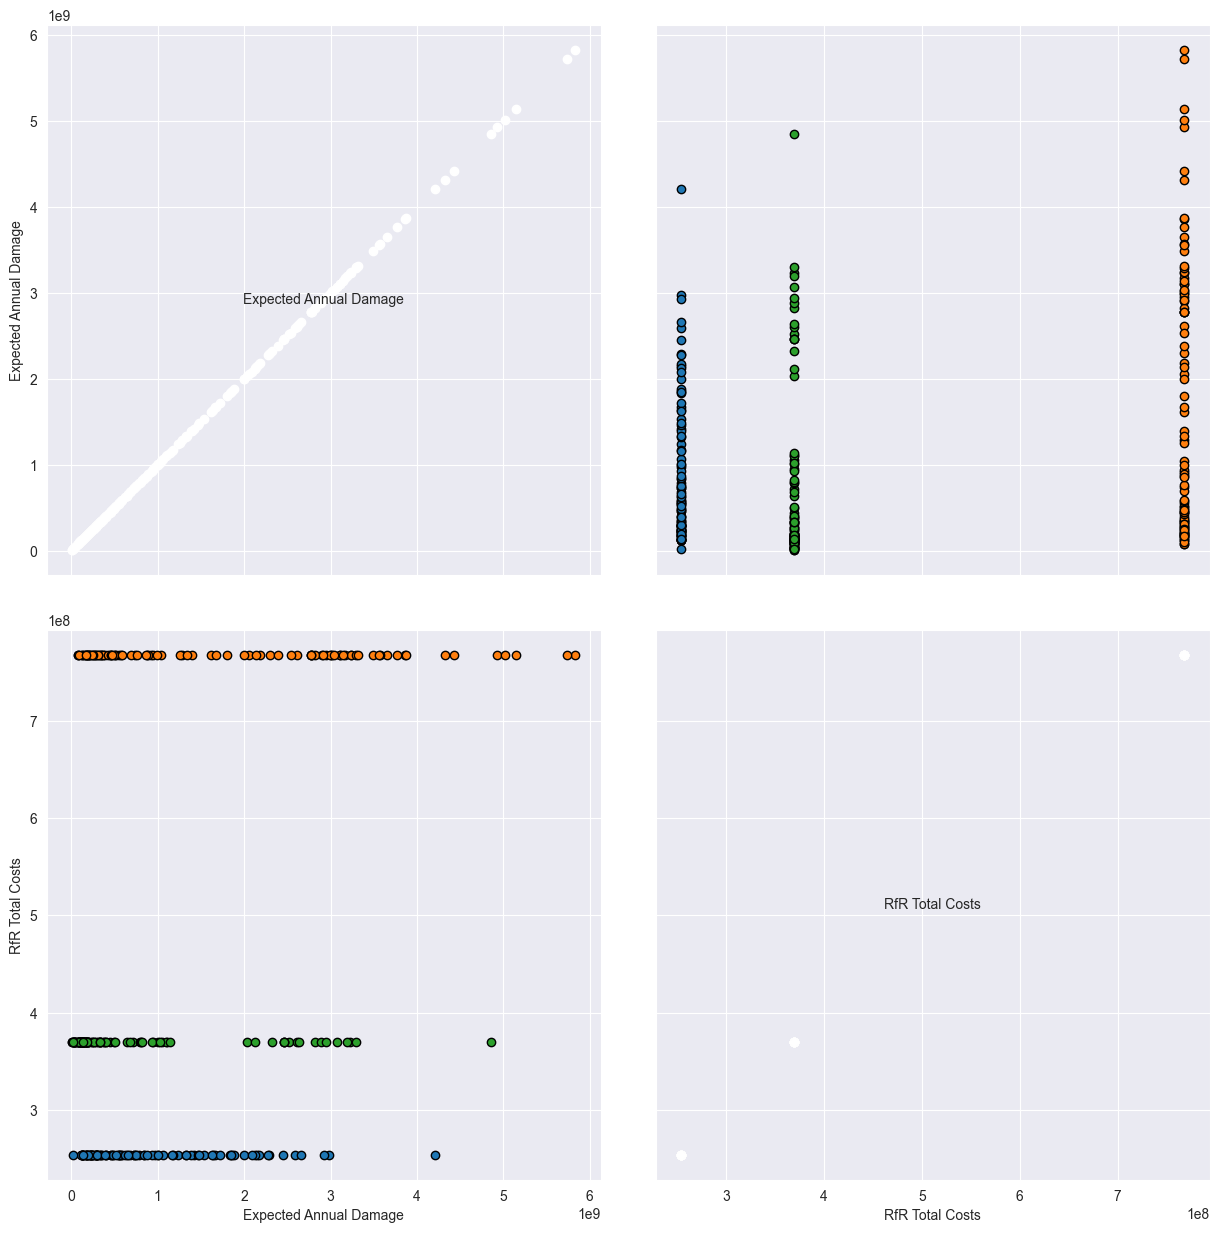

In [28]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [29]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/cq/_rbxzkq17533m5qdt1c__dyw0000gn/T/ipykernel_48594/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,RfR Total Costs
policy,,,,,,,,,,,,,,,,,,,,,
policy 1,65.99,190.121858,0.500012,190.03135,0.499502,190.16266,0.499723,190.068198,0.500895,190.013353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.965416e+08,253800000.0
policy 3,65.99,190.121858,0.500012,190.03135,0.499502,190.16266,0.499723,190.068198,0.500895,190.013353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.276808e+08,369700000.0
policy 2,65.99,190.121858,0.500012,190.03135,0.499502,190.16266,0.499723,190.068198,0.500895,190.013353,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.712356e+09,768300000.0


In [14]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [15]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:19<00:00, 15.32it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [16]:
experiments, outcomes = results

In [17]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Expected Annual Damage,RfR Total Costs
0,2.148542e+09,253800000.0
1,1.002035e+09,253800000.0
2,4.563797e+08,253800000.0
3,4.564004e+08,253800000.0
4,3.353403e+08,253800000.0
...,...,...
295,1.366624e+08,369700000.0
296,3.351471e+08,369700000.0
297,2.306869e+07,369700000.0
298,8.200146e+08,369700000.0


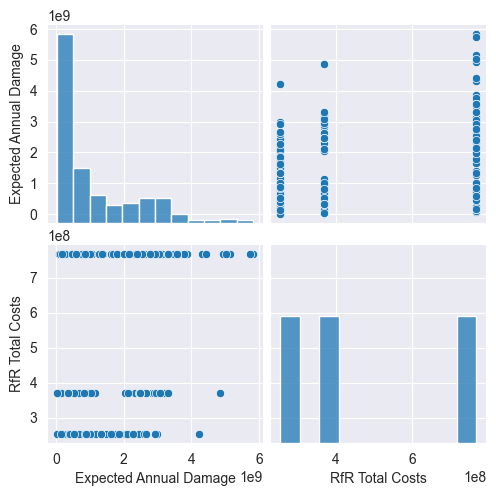

In [18]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

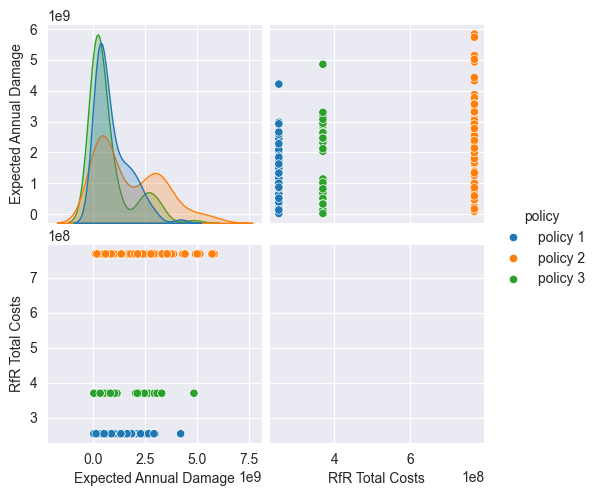

In [19]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()